# **PLACEMENT PREDICTION SYSTEM USING MACHINE LEARNING**

Problem: To make most of available resoures provide timely support and guarantee excellent acedemic and career outcomes it is crucial to know when the student will graduate and whether they will receive a placement

### DESCRIPTION: It is a Supervised learning model which is uses logistic regression algorithm
date: 7 sept 2024
total time taken : 3 days

importing pandas library

In [69]:
#Pandas provides two data structures Series and DataFrame,
# which give you flexibility to work with data sets in different formats, like tabular, time-series, and matrix data.
import pandas as pd

In [70]:
#loading the datasets
dataset = pd.read_csv('Placement.csv')

In [71]:
# warnings module in Python provides a way to control how warnings handled within a Python script
import warnings

In [72]:
warnings.filterwarnings('ignore')#ignore the warnings

### EXPLORATORY DATA ANALYSIS

In [73]:
#displaying top five rows
dataset.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,0,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,0,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,0,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,0,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,0,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [74]:
#for the last 5 rows
dataset.tail()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
210,211,0,80.6,Others,82.0,Others,Commerce,77.6,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,212,0,58.0,Others,60.0,Others,Science,72.0,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,213,0,67.0,Others,67.0,Others,Commerce,73.0,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,214,1,74.0,Others,66.0,Others,Commerce,58.0,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0
214,215,0,62.0,Central,58.0,Others,Science,53.0,Comm&Mgmt,No,89.0,Mkt&HR,60.22,Not Placed,NaN


In [75]:
#for finding out the shape of the data. it is a attribute not a method
dataset.shape

(215, 15)

In [76]:
#printing the no. of rows and columns
print("Number of Rows are",dataset.shape[0])
print("Number of Columns are",dataset.shape[1])

Number of Rows are 215
Number of Columns are 15


In [77]:
#Information About Our Dataset Like
#the Total Number of Rows, Total Number of Columns, Datatypes of Each Column And Memory Requirement
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    int64  
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(2), object(7)
memory usage: 25.3+ KB


# DATA CLEANING

In [78]:
#it will sum up all the null values of the dataset
dataset.isnull().sum()

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

only salary contains 67 null values

In [79]:
 #to Get Overall Statistics About The Dataset
 dataset.describe()

,sl_no,gender,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,148.000000
mean,108.000000,0.353488,67.303395,66.333163,66.370186,72.100558,62.278186,288655.405405
std,62.209324,0.479168,10.827205,10.897509,7.358743,13.275956,5.833385,93457.452420
min,1.000000,0.000000,40.890000,37.000000,50.000000,50.000000,51.210000,200000.000000
25%,54.500000,0.000000,60.600000,60.900000,61.000000,60.000000,57.945000,240000.000000
50%,108.000000,0.000000,67.000000,65.000000,66.000000,71.000000,62.000000,265000.000000
75%,161.500000,1.000000,75.700000,73.000000,72.000000,83.500000,66.255000,300000.000000
max,215.000000,1.000000,89.400000,97.700000,91.000000,98.000000,77.890000,940000.000000


In [80]:
#it will provide all the columns in the dataset
dataset.columns

Index(['sl_no', 'gender', 'ssc_p', 'ssc_b', 'hsc_p', 'hsc_b', 'hsc_s',
       'degree_p', 'degree_t', 'workex', 'etest_p', 'specialisation', 'mba_p',
       'status', 'salary'],
      dtype='object')

In [81]:
#to know the values in status column
dataset['status'].unique()

array(['Placed', 'Not Placed'], dtype=object)

*Question* : How many students got placed(count)?

In [82]:
dataset['status'].value_counts()

status
Placed        148
Not Placed     67
Name: count, dtype: int64

*Question 2* : what are the top 5 science and tech students placed according to their salary?

In [83]:
(dataset['degree_t']=="Sci&Tech") & (dataset['status']=="Placed")

0       True
1       True
2      False
3      False
4      False
       ...  
210    False
211     True
212    False
213    False
214    False
Length: 215, dtype: bool

In [84]:
dataset[(dataset['degree_t']=="Sci&Tech") & (dataset['status']=="Placed")].sort_values(by="salary",ascending=False).head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
150,151,0,71.00,Central,58.66,Central,Science,58.00,Sci&Tech,Yes,56.0,Mkt&Fin,61.30,Placed,690000.0
77,78,0,64.00,Others,80.00,Others,Science,65.00,Sci&Tech,Yes,69.0,Mkt&Fin,57.65,Placed,500000.0
163,164,0,63.00,Others,67.00,Others,Science,64.00,Sci&Tech,No,75.0,Mkt&Fin,66.46,Placed,500000.0
174,175,0,73.24,Others,50.83,Others,Science,64.27,Sci&Tech,Yes,64.0,Mkt&Fin,66.23,Placed,500000.0
53,54,0,80.00,Others,70.00,Others,Science,72.00,Sci&Tech,No,87.0,Mkt&HR,71.04,Placed,450000.0


#### **DATA PREPROCESSING**

In [85]:
#we saw slary column had 65 null values in total so dropping(deleting the values)
dataset = dataset.drop(['sl_no','salary'],axis=1)

In [86]:
dataset.head()
#salary column is now deleted

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
0,0,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed
1,0,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed
2,0,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed
3,0,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed
4,0,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed


#### **DATA ENCODING**
Encoding is the process of using various patterns of voltage or current levels to represent 1s and 0s of the digital signals

In [87]:
#first start with the column ssc_b
dataset['ssc_b'].unique()

array(['Others', 'Central'], dtype=object)

In [88]:
#we use map function to encode the data
dataset['ssc_b'] = dataset['ssc_b'].map({'Central':1,'Others':0})

In [89]:
#checking
dataset.head(2)

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
0,0,67.00,0,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed
1,0,79.33,1,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed


In [90]:
#now encoding hsc_b
dataset['hsc_b'].unique()

array(['Others', 'Central'], dtype=object)

In [91]:
dataset['hsc_b'] = dataset['hsc_b'].map({'Central':1,'Others':0})

In [92]:
#same checking
dataset.head(3)

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
0,0,67.00,0,91.00,0,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed
1,0,79.33,1,78.33,0,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed
2,0,65.00,1,68.00,1,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed


In [93]:
#now with hsc_s
dataset['hsc_s'].unique()

array(['Commerce', 'Science', 'Arts'], dtype=object)

In [94]:
#there are three values so science as two commerce as 1 and arts as 0
dataset['hsc_s'] = dataset['hsc_s'].map({'Science':2,'Commerce':1,'Arts':0})

In [95]:
dataset.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
0,0,67.00,0,91.00,0,1,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed
1,0,79.33,1,78.33,0,2,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed
2,0,65.00,1,68.00,1,0,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed
3,0,56.00,1,52.00,1,2,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed
4,0,85.80,1,73.60,1,1,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed


In [96]:
#now with degree_t column
dataset['degree_t'].unique()

array(['Sci&Tech', 'Comm&Mgmt', 'Others'], dtype=object)

In [97]:
dataset['degree_t'] = dataset['degree_t'].map({'Sci&Tech':2,'Comm&Mgmt':1,'Others':0})

In [98]:
#now encode specialisation column
dataset['specialisation'].unique()

array(['Mkt&HR', 'Mkt&Fin'], dtype=object)

In [99]:
dataset['specialisation'] =dataset['specialisation'].map({'Mkt&HR':1,'Mkt&Fin':0})

In [100]:
#now encode workex column
dataset['workex'].unique()

array(['No', 'Yes'], dtype=object)

In [101]:
dataset['workex'] = dataset['workex'].map({'Yes':1,'No':0})

In [102]:
#now check the encoding
dataset.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
0,0,67.00,0,91.00,0,1,58.00,2,0,55.0,1,58.80,Placed
1,0,79.33,1,78.33,0,2,77.48,2,1,86.5,0,66.28,Placed
2,0,65.00,1,68.00,1,0,64.00,1,0,75.0,0,57.80,Placed
3,0,56.00,1,52.00,1,2,52.00,2,0,66.0,1,59.43,Not Placed
4,0,85.80,1,73.60,1,1,73.30,1,0,96.8,0,55.50,Placed


In [103]:
#only status is not encoded
dataset['status'].unique()

array(['Placed', 'Not Placed'], dtype=object)

In [104]:
dataset['status'] = dataset['status'].map({'Placed':1,'Not Placed':0})

In [105]:
dataset.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
0,0,67.00,0,91.00,0,1,58.00,2,0,55.0,1,58.80,1
1,0,79.33,1,78.33,0,2,77.48,2,1,86.5,0,66.28,1
2,0,65.00,1,68.00,1,0,64.00,1,0,75.0,0,57.80,1
3,0,56.00,1,52.00,1,2,52.00,2,0,66.0,1,59.43,0
4,0,85.80,1,73.60,1,1,73.30,1,0,96.8,0,55.50,1


*data encoding is done*

#### **TRAINING**

Store Feature Matrix In X and Response(Target)(DEPENDENT FEATURE) In Vector y

In [106]:
dataset.columns

Index(['gender', 'ssc_p', 'ssc_b', 'hsc_p', 'hsc_b', 'hsc_s', 'degree_p',
       'degree_t', 'workex', 'etest_p', 'specialisation', 'mba_p', 'status'],
      dtype='object')

In [107]:
#storing the feature matrics
X = dataset.drop('status',axis=1)#independent input features are all columns except status
y= dataset['status']#dependent output features

In [108]:
X

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p
0,0,67.00,0,91.00,0,1,58.00,2,0,55.0,1,58.80
1,0,79.33,1,78.33,0,2,77.48,2,1,86.5,0,66.28
2,0,65.00,1,68.00,1,0,64.00,1,0,75.0,0,57.80
3,0,56.00,1,52.00,1,2,52.00,2,0,66.0,1,59.43
4,0,85.80,1,73.60,1,1,73.30,1,0,96.8,0,55.50
...,...,...,...,...,...,...,...,...,...,...,...,...
210,0,80.60,0,82.00,0,1,77.60,1,0,91.0,0,74.49
211,0,58.00,0,60.00,0,2,72.00,2,0,74.0,0,53.62
212,0,67.00,0,67.00,0,1,73.00,1,1,59.0,0,69.72
213,1,74.00,0,66.00,0,1,58.00,1,0,70.0,1,60.23


In [109]:
y

0      1
1      1
2      1
3      0
4      1
      ..
210    1
211    1
212    1
213    1
214    0
Name: status, Length: 215, dtype: int64

**Splitting The Dataset Into The Training Set And Test Set**

In [110]:
from sklearn.model_selection import train_test_split
#Split arrays or matrices into random train and test subsets
#minimize the potential for bias

In [111]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)

**Import The models**

In [112]:
#In our model, the target variable(status) contains discrete values that is categorial values which are placed or not placed
#so this is classification problem
#importing all the classification machine learning algorithms

In [113]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier#KNN
from sklearn import svm#SUPPORT VECTOR MACHINE
from sklearn.tree import DecisionTreeClassifier#DECISION TREE
from sklearn.ensemble import RandomForestClassifier#RANDOM FOREST
from sklearn.ensemble import GradientBoostingClassifier

## **MODEL TRAINING**

In [114]:
#logistic regression
#create instance of it - lr
lr = LogisticRegression()
lr.fit(X_train,y_train)
#for svm

svm = svm.SVC()
svm.fit(X_train,y_train)

knn=KNeighborsClassifier()
knn.fit(X_train,y_train)

dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)

rf=RandomForestClassifier()
rf.fit(X_train,y_train)

gb=GradientBoostingClassifier()
gb.fit(X_train,y_train)

GradientBoostingClassifier()

#### Prediction on Test Data

> on the unseen samples



In [115]:
y_pred1 = lr.predict(X_test)
y_pred2 = svm.predict(X_test)
y_pred3 = knn.predict(X_test)
y_pred4 = dt.predict(X_test)
y_pred5 = rf.predict(X_test)
y_pred6 = gb.predict(X_test)

### Evaluating the Algorithms to know the best one with highest accuracy

In [116]:
#to give the accuracy score of each algorithm
from sklearn.metrics import accuracy_score

In [117]:
score1=accuracy_score(y_test,y_pred1)
score2=accuracy_score(y_test,y_pred2)
score3=accuracy_score(y_test,y_pred3)
score4=accuracy_score(y_test,y_pred4)
score5=accuracy_score(y_test,y_pred5)
score6=accuracy_score(y_test,y_pred6)

In [118]:
print(score1,score2,score3,score4,score5,score6)

0.8837209302325582 0.7674418604651163 0.7906976744186046 0.8372093023255814 0.7906976744186046 0.813953488372093


In [119]:
#we can tell that prediction with 1 that is logistic regression is the highest and 2 and 5 has the lowest accuracy

In [120]:
#to show it in more proper way
final = pd.DataFrame({'Models':['LR','SVC','KNN','DT','RF','GB'],
            'ACC':[score1*100,
                  score2*100,
                  score3*100,
                  score4*100,
                  score5*100,
                  score6*100]})

In [121]:
final

,Models,ACC
0,LR,88.372093
1,SVC,76.744186
2,KNN,79.069767
3,DT,83.720930
4,RF,79.069767
5,GB,81.395349


In [122]:
#to show this result we will use a bar plot graph
#importing the seaborn module
import seaborn as sns

<Axes: ylabel='ACC'>

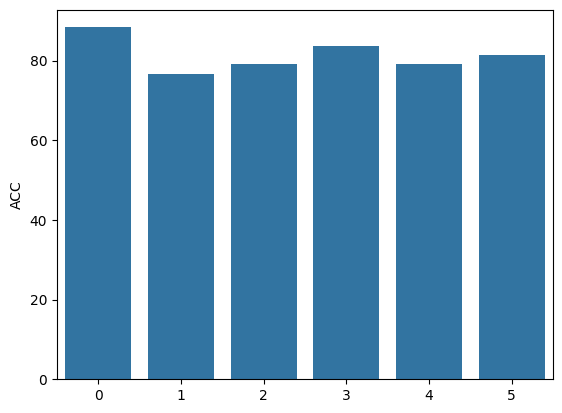

In [123]:
#this clearly shows that linear regression has the highest accuracy
sns.barplot(final['ACC'])

#### **Prediction on New Data**

In [124]:
new_data = pd.DataFrame({
    'gender':0,
    'ssc_p':67.0,
    'ssc_b':0,
    'hsc_p':91.0,
    'hsc_b':0,
    'hsc_s':1,
    'degree_p':58.0,
    'degree_t':2,
    'workex':0,
    'etest_p':55.0,
    'specialisation':1,
    'mba_p':58.8,
},index=[0])

In [125]:
lr= LogisticRegression()
lr.fit(X,y)
#as it has the highest accuracy

LogisticRegression()

In [126]:
p=lr.predict(new_data)
prob=lr.predict_proba(new_data)
if p==1:
    print('Placed')
    print(f"According to this model the probability of your placement is {prob[0][1]:.2f}")
else:
    print("Not-placed")

Placed
According to this model the probability of your placement is 0.97


In [127]:
prob
#the probability of getting placed is 96% and not getting placed is 3%

array([[0.03330113, 0.96669887]])

### SAVING THE MODEL USING JOBLIB

In [128]:
import joblib
#joblib is more efficient than pickle when working with large machine learning models or large numpy arrays.

In [129]:
joblib.dump(lr,'model_campus_placement')

['model_campus_placement']

In [130]:
model = joblib.load('model_campus_placement')

In [131]:
model.predict(new_data)

array([1], dtype=int64)

## **GUI**

In [132]:
%matplotlib inline
import matplotlib.pyplot as plt


In [133]:
!pip install --upgrade pip

In [ ]:
from tkinter import *
import joblib
import numpy as np
from sklearn import *
import tkinter.font as font
import pandas as pd

def show_entry_fields():
    text = clicked.get()
    if text == "Male":
        p1=1
        print(p1)
    else:
        p1=0
        print(p1)
    p2=float(e2.get())
    text = clicked1.get()
    if text == "Central":
        p3=1
        print(p3)
    else:
        p3=0
        print(p3)
    p4=float(e4.get())
    text = clicked6.get()
    if text == "Central":
        p5=1
        print(p3)
    else:
        p5=0
        print(p3)
    text = clicked2.get()
    if text == "Science(MATHS)":
        p6=2
        print(p6)
    elif text == "Commerce":
        p6=1
        print(p6)
    else:
        p6=0
        print(p6)
    p7=float(e7.get())
    text = clicked3.get()
    if text == "Science & Technology":
        p8=2
        print(p8)
    elif text=="Commerce & Management":
        p8=1
        print(p8)
    else:
        p8=0
        print(p8)
    text = clicked4.get()
    if text == "Yes":
        p9=1
        print(p3)
    else:
        p9=0
        print(p3)
    p10=float(e10.get())
    text = clicked5.get()
    if text == "Marketing & HR":
        p11=1
        print(p11)
    else:
        p11=0
        print(p11)
    p12=float(e12.get())

    model = joblib.load('model_campus_placement')
    new_data = pd.DataFrame({
    'gender':p1,
    'ssc_p':p2,
    'ssc_b':p3,
    'hsc_p':p4,
    'hsc_b':p5,
    'hsc_s':p6,
    'degree_p':p7,
    'degree_t':p8,
    'workex':p9,
    'etest_p':p10,
     'specialisation':p11,
    'mba_p':p12,   
},index=[0])
    result=model.predict(new_data)
    result1=model.predict_proba(new_data)
    
    if result[0] == 0:
        Label(master, text="There a no chance of getting placed according to the data").grid(row=31)
    else:
        Label(master, text="Student Will be Placed With Probability of",font=("Arial", 15)).grid(row=31)
        Label(master, text=round(result1[0][1],2)*100,font=("Arial", 15)).grid(row=33)
        Label(master, text="Percent",font=("Arial", 20)).grid(row=34)

master = Tk()
master.title("Campus Placement Prediction System")

label = Label(master, text = "Placement Prediction System : Know your chances of getting placed!"
                          , bg = "blue", fg = "navy",font=("Helvetica", 30)) \
                               .grid(row=0,columnspan=4)


Label(master, text="Gender",font=("Arial", 20)).grid(row=1)
Label(master, text="Secondary Education percentage- 10th Grade %",font=("Arial", 20)).grid(row=2)
Label(master, text="Board of Education",font=("Arial", 20)).grid(row=3)
Label(master, text="Higher Secondary Education percentage- 12th Grade %",font=("Arial", 20)).grid(row=4)
Label(master, text="Board of Education",font=("Arial", 20)).grid(row=5)
Label(master, text="Specialization in Higher Secondary Education",font=("Arial", 20)).grid(row=6)
Label(master, text="Degree Percentage",font=("Arial", 20)).grid(row=7)
Label(master, text="Under Graduation(Degree type)- Field of degree education",font=("Arial", 20)).grid(row=8)
Label(master, text="Do you have Work Experience",font=("Arial", 20)).grid(row=9)
Label(master, text="Enter your test percentage in CAT exam",font=("Arial", 20)).grid(row=10)
Label(master, text="Branch specialization(MBA)",font=("Arial", 20)).grid(row=11)
Label(master, text="MBA percentage",font=("Arial", 20)).grid(row=12)
clicked = StringVar()
options = ["Male","Female"]

clicked1 = StringVar()
options1 = ["Central","Others"]

clicked2 = StringVar()
options2 = ["Science(MATHS)","Commerce","Arts"]

clicked3 = StringVar()
options3 = ["Science & Technology ","Commerce & Management","Others"]

clicked4 = StringVar()
options4 = ["Yes","No"]

clicked5 = StringVar()
options5 = ["Marketing & HR","Marketing & Finance"]

clicked6 = StringVar()
options6 = ["Central","Others"]
e1 = OptionMenu(master , clicked , *options )
e1.configure(width=18)
e2 = Entry(master)
e3 = OptionMenu(master , clicked1 , *options1 )
e3.configure(width=18)
e4 = Entry(master)
e5 = OptionMenu(master , clicked6 , *options6)
e5.configure(width=18)
e6 = OptionMenu(master , clicked2 , *options2)
e6.configure(width=18)
e7 = Entry(master)
e8 = OptionMenu(master , clicked3 , *options3)
e8.configure(width=18)
e9 = OptionMenu(master , clicked4 , *options4)
e9.configure(width=18)
e10 = Entry(master)
e11 = OptionMenu(master , clicked5 , *options5)
e11.configure(width=18)
e12 = Entry(master)


e1.grid(row=1, column=1)
e2.grid(row=2, column=1)
e3.grid(row=3, column=1)
e4.grid(row=4, column=1)
e5.grid(row=5, column=1)
e6.grid(row=6, column=1)
e7.grid(row=7, column=1)
e8.grid(row=8, column=1)
e9.grid(row=9, column=1)
e10.grid(row=10, column=1)
e11.grid(row=11, column=1)
e12.grid(row=12, column=1)
buttonFont = font.Font(family='Helvetica', size=16, weight='bold')
Button(master, text='Predict',height= 1, width=8,activebackground='#00ff00',font=buttonFont,bg='black', fg='white',command=show_entry_fields).grid()

mainloop()

0
1
1
2
0
1
0
0
1
1
2
0
1
1
0
1
1
2
0
1
1
1
1
1
2
0
1
1
1
1
1
2
1
1
1
1
1
1
2
0
1
1


In [ ]:
!apt-get install -y xvfb

In [ ]:
import os
os.system("Xvfb :5 -ac -screen 0 720x720x16 &")
os.environ['DISPLAY']=':5.0'

### THANKYOU